In [48]:
# manipulation
import pandas as pd
import numpy as np 
import math
from scipy.spatial import distance

# statsbomb
from statsbombpy import sb

# visualisation
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import seaborn as sns
import plotly.graph_objects as go
from plotly_football_pitch import (
    make_pitch_figure,
    PitchDimensions,
    SingleColourBackground
)

# utilitaires
import ast
from tqdm import tqdm

In [49]:
df = pd.read_csv(r'../data/freekick_pass_shot.csv', encoding = 'latin1')

C:\Users\Aqsone\AppData\Local\Temp\ipykernel_11740\752390245.py:1: DtypeWarning:

Columns (39,45,46,50,53,59,77,98,99,102,103,106,108,114,117) have mixed types. Specify dtype option on import or set low_memory=False.



In [50]:
df[['x', 'y']] = df['location'].str.extract(r'\[(.*), (.*)\]').astype(float)

In [51]:
df.columns[40:80]

Index(['pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_deflected',
       'pass_end_location', 'pass_goal_assist', 'pass_height',
       'pass_inswinging', 'pass_length', 'pass_outcome', 'pass_outswinging',
       'pass_recipient', 'pass_recipient_id', 'pass_shot_assist',
       'pass_switch', 'pass_technique', 'pass_through_ball', 'pass_type',
       'period', 'play_pattern', 'player', 'player_id', 'position',
       'possession', 'possession_team', 'possession_team_id', 'related_events',
       'second', 'shot_aerial_won', 'shot_body_part', 'shot_end_location',
       'shot_first_time', 'shot_freeze_frame', 'shot_key_pass_id',
       'shot_one_on_one', 'shot_outcome', 'shot_statsbomb_xg'],
      dtype='object')

In [52]:
df['pass_shot_assist'].value_counts()

pass_shot_assist
True    2700
Name: count, dtype: int64

In [53]:
df['y_symetric'] = [(80-y) if y<40 else y for y in df['y']]

2700


C:\Users\Aqsone\AppData\Local\Temp\ipykernel_11740\1511942520.py:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



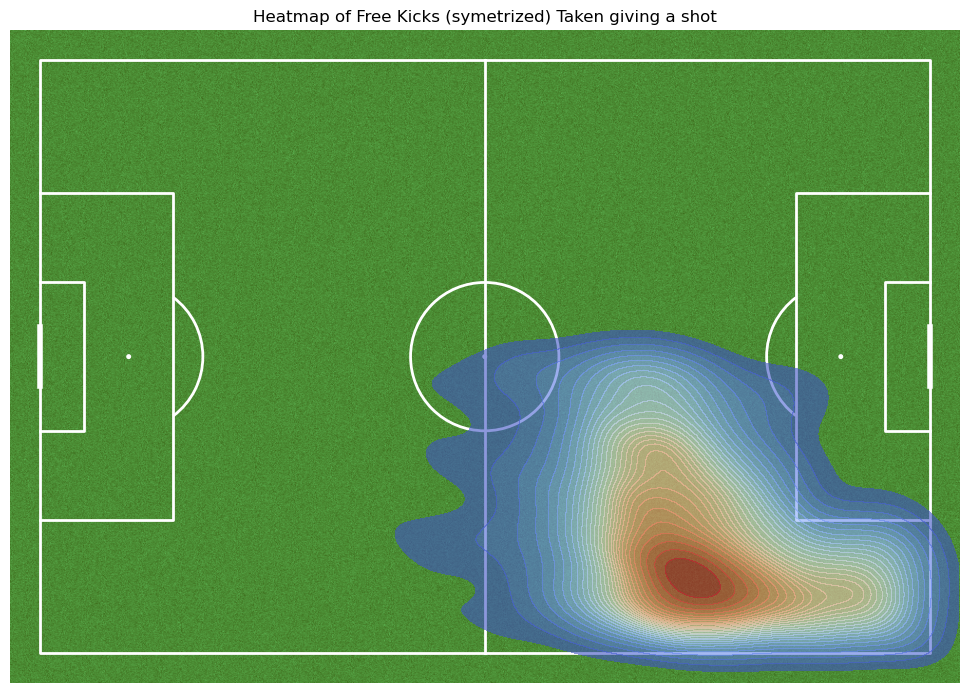

In [54]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fk_pass = df[(df['pass_type'] == 'Free Kick') & (df['pass_shot_assist']==True)]
print(len(fk_pass))
# Set up the plot
fig, ax = pitch.draw(figsize=(10, 7))

# Plot the heatmap
sns.kdeplot(
    x=fk_pass['x'], 
    y=fk_pass['y_symetric'], 
    shade=True, 
    cmap='coolwarm', 
    n_levels=30, 
    alpha=0.6, 
    ax=ax
)

plt.title('Heatmap of Free Kicks (symetrized) Taken giving a shot')
plt.show()

9931


C:\Users\Aqsone\AppData\Local\Temp\ipykernel_11740\4063210317.py:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



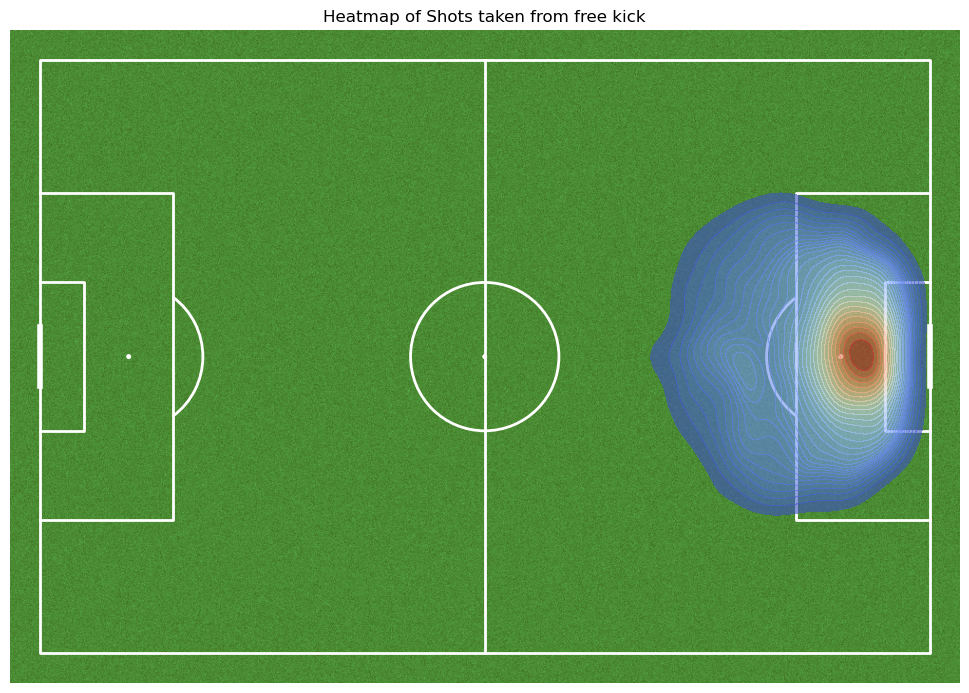

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch

pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
shots = df[(df['type'] == 'Shot')]
print(len(shots))

# Set up the plot
fig, ax = pitch.draw(figsize=(10, 7))

# Plot the heatmap
sns.kdeplot(
    x=shots['x'], 
    y=shots['y'], 
    shade=True, 
    cmap='coolwarm', 
    n_levels=30, 
    alpha=0.6, 
    ax=ax
)

plt.title('Heatmap of Shots taken from free kick')
plt.show()

1011


C:\Users\Aqsone\AppData\Local\Temp\ipykernel_11740\4210213322.py:12: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



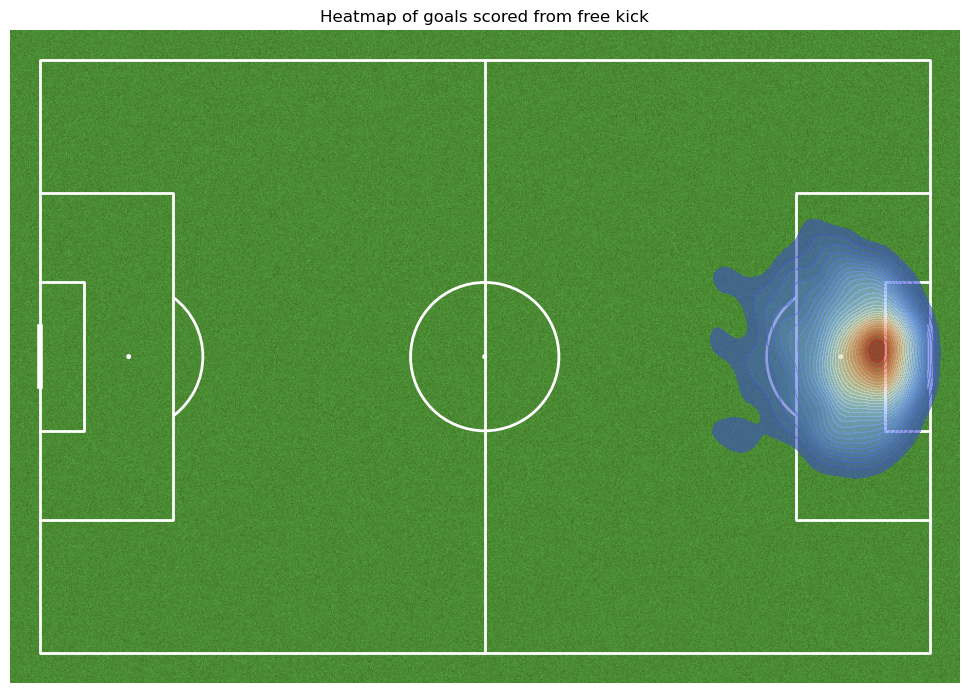

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch

pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
goals = df[(df['type'] == 'Shot') & (df['shot_outcome'] == 'Goal')]
print(len(goals))
# Set up the plot
fig, ax = pitch.draw(figsize=(10, 7))

# Plot the heatmap
sns.kdeplot(
    x=goals['x'], 
    y=goals['y'], 
    shade=True, 
    cmap='coolwarm', 
    n_levels=30, 
    alpha=0.6, 
    ax=ax
)

plt.title('Heatmap of goals scored from free kick')
plt.show()

In [57]:
def sanitize_rel_events(event):
    
    if pd.isna(event):
        return []
    
    if len(event) > 40:
        clean_event = event[1:-1].replace("'", "").replace(" ", "").split(',')
    else : 
        clean_event = [event[1:-1]]
    
    return clean_event

df['related_events'].astype(str).replace('nan', '')
df['related_events_clean'] = df['related_events'].apply(sanitize_rel_events)

fk_pass['related_events_clean'] = fk_pass['related_events'].apply(sanitize_rel_events)

C:\Users\Aqsone\AppData\Local\Temp\ipykernel_11740\230919916.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [111]:
shots_from_fk = []
fk_assist_shot = []

for i in tqdm(range(len(df))):
    if (df['pass_type'][i] == 'Free Kick'):
        rel_shot = df['pass_assisted_shot_id'][i] 
        if pd.notna(rel_shot):
            shots_from_fk.append(rel_shot)
            fk_assist_shot.append(df['id'][i])
            
print("Number of Shots taken from a Pass Free Kick :", len(shots_from_fk))

100%|██████████| 106908/106908 [00:00<00:00, 176182.82it/s]

Number of Shots taken from a Pass Free Kick : 2986


2986


C:\Users\Aqsone\AppData\Local\Temp\ipykernel_11740\2269126072.py:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



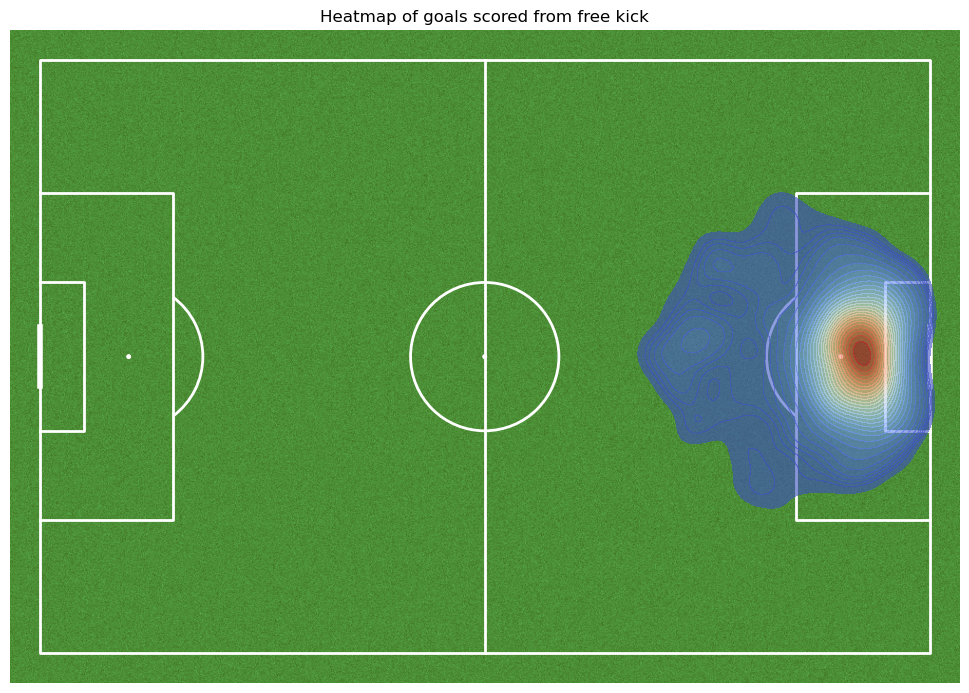

In [112]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
shot_after_fk = df[df['id'].isin(shots_from_fk)]
print(len(shot_after_fk))

fig, ax = pitch.draw(figsize=(10, 7))

kde = sns.kdeplot(
    x=shot_after_fk['x'], 
    y=shot_after_fk['y'], 
    shade=True, 
    cmap='coolwarm', 
    n_levels=30, 
    alpha=0.6, 
    ax=ax
)

plt.title('Heatmap of goals scored from free kick')
plt.show()

c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='shot_statsbomb_xg', ylabel='Count'>

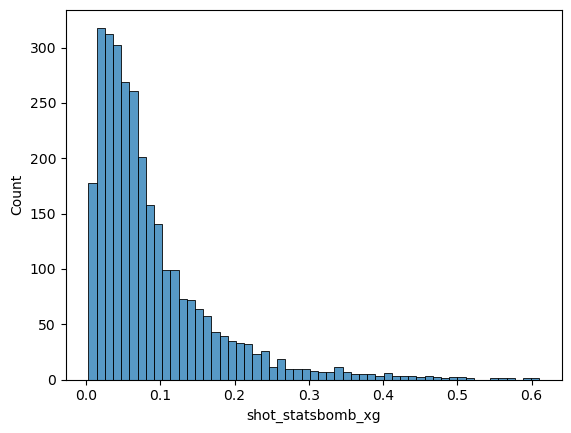

In [113]:
# histogram of shots from freekick
sns.histplot(shot_after_fk['shot_statsbomb_xg'])

C:\Users\Aqsone\AppData\Local\Temp\ipykernel_11740\1873540822.py:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



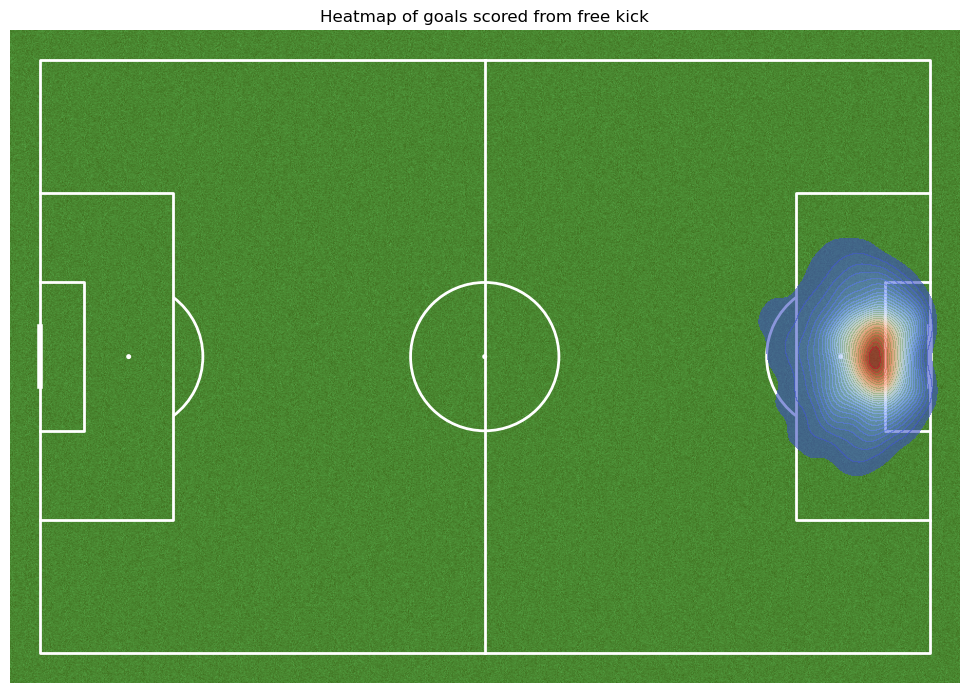

In [114]:
# weighted heatmap by xg
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')

fig, ax = pitch.draw(figsize=(10, 7))

kde = sns.kdeplot(
    x=shot_after_fk['x'], 
    y=shot_after_fk['y'], 
    shade=True, 
    weights=shot_after_fk['shot_statsbomb_xg'],
    cmap='coolwarm', 
    n_levels=30, 
    alpha=0.6, 
    ax=ax
)

plt.title('Heatmap of goals scored from free kick')
plt.show()

In [115]:
dimensions = PitchDimensions(pitch_width_metres=80, pitch_length_metres=120)

fig = make_pitch_figure(
    dimensions,
    pitch_background=SingleColourBackground("#3ab54a"),

)

shots = go.Scatter(
        x=shot_after_fk['x'],
        y=shot_after_fk['y'],
        mode="markers",
        marker={"size": 2 + 30*shot_after_fk['shot_statsbomb_xg'], "color": "red"},
        hovertext=shot_after_fk['shot_statsbomb_xg'],
        showlegend=False,
    )

fig.add_trace(shots)

fig.update_layout(height = 850, width = 1200, title="Scatter plot of shots with size corresponding to xG")
fig.show()

In [116]:
shot_after_fk.reset_index(inplace = True, drop = True)
shot_after_fk['float_location'] = [ast.literal_eval(shot_after_fk['location'][i]) for i in range(len(shot_after_fk))]

goal_loc = [120, 40]
shot_after_fk['distance_to_goal'] = [distance.euclidean(shot_after_fk['float_location'][i], goal_loc) for i in range(len(shot_after_fk))]

def calculate_angle(point1, point2):
    delta_y = point2[1] - point1[1]
    delta_x = point2[0] - point1[0]
    angle = math.atan2(delta_y, delta_x)
    angle_degrees = math.degrees(angle)

    if angle_degrees < 0:
        angle_degrees += 360
        
    if angle_degrees > 180:
        angle_degrees = 360 - angle_degrees
        
    return angle_degrees

shot_after_fk['angle_shot'] = [calculate_angle(shot_after_fk['float_location'][i], goal_loc) for i in range(len(shot_after_fk))]

C:\Users\Aqsone\AppData\Local\Temp\ipykernel_11740\4138342063.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Aqsone\AppData\Local\Temp\ipykernel_11740\4138342063.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Aqsone\AppData\Local\Temp\ipykernel_11740\4138342063.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [117]:
shot_after_fk['shot_outcome'].value_counts()

shot_outcome
Off T               1219
Saved                673
Blocked              484
Goal                 286
Wayward              226
Post                  67
Saved Off Target      20
Saved to Post         11
Name: count, dtype: int64

In [118]:
import plotly.express as px

fig = px.scatter(shot_after_fk, 
                 x="distance_to_goal", 
                 y="shot_statsbomb_xg", 
                 color="shot_outcome",
                )

fig.update_layout(title = "Expected Goals in function of Distance to goal")
fig.show()

In [119]:
len(shot_after_fk)*0.05

149.3

In [120]:
import pandas as pd
import numpy as np
import plotly.express as px

# Assuming you have a DataFrame `df` with the columns `distance_to_goal` and `shot_statsbomb_xg`
# df = pd.read_csv('your_data.csv')

# Bin the distance_to_goal
bins = np.linspace(shot_after_fk['distance_to_goal'].min(), shot_after_fk['distance_to_goal'].max(), 50)
shot_after_fk['binned_distance'] = pd.cut(shot_after_fk['distance_to_goal'], bins)

# Compute the 95th percentile for each bin
percentiles = shot_after_fk.groupby('binned_distance')['shot_statsbomb_xg'].quantile(0.95).reset_index()
percentiles['distance_to_goal'] = percentiles['binned_distance'].apply(lambda x: x.mid)

# Create scatter plot
fig = px.scatter(shot_after_fk, x='distance_to_goal', y='shot_statsbomb_xg', color='shot_outcome',
                 title='Expected Goals in function of Distance to goal')

# Add the 95th percentile line
fig.add_scatter(x=percentiles['distance_to_goal'], y=percentiles['shot_statsbomb_xg'], mode='lines', name='95th Percentile',line=dict(color='black', width=5))

fig.show()


C:\Users\Aqsone\AppData\Local\Temp\ipykernel_11740\159886814.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Aqsone\AppData\Local\Temp\ipykernel_11740\159886814.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [121]:
fig = px.scatter(shot_after_fk, 
                 x="angle_shot", 
                 y="shot_statsbomb_xg", 
                 color="shot_outcome",
                )

fig.update_layout(title = "Expected Goals in function of Distance to goal")
fig.show()

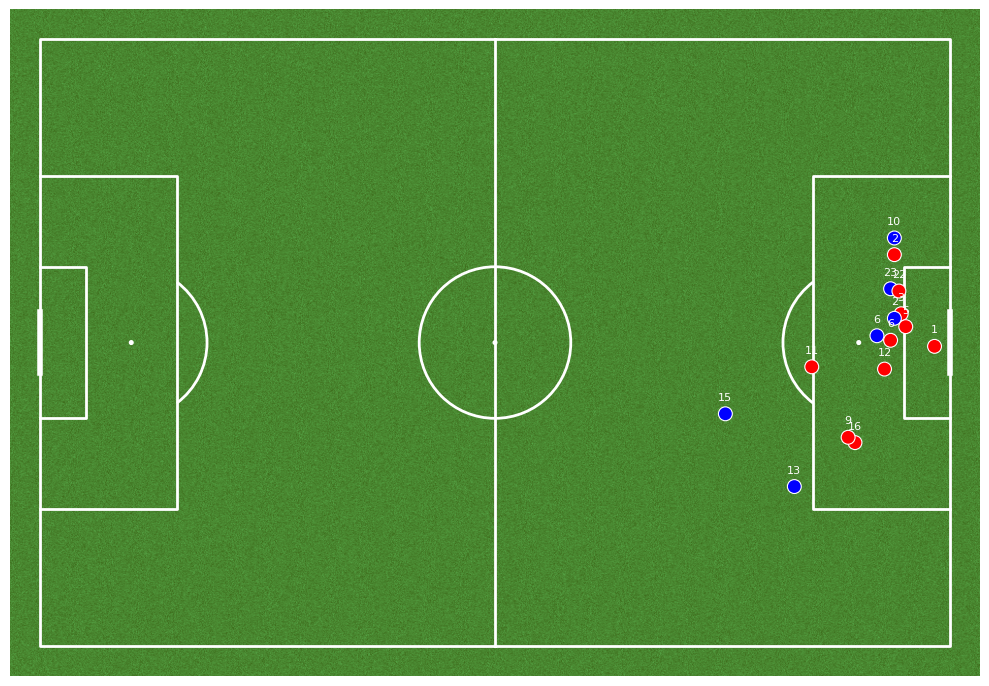

In [122]:
# Create the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 7))

# Data for plotting
players = ast.literal_eval(shot_after_fk[shot_after_fk['shot_statsbomb_xg'] == 0.5080946]['shot_freeze_frame'].values[0])

# Extract locations and player names
x = [player['location'][0] for player in players]
y = [player['location'][1] for player in players]
names = [player['position']['id'] for player in players]
teammates = [player['teammate'] for player in players]

palette = {True: 'blue', False: 'red'}
sns.scatterplot(x=x, y=y, ax=ax, s=100, hue=teammates, palette=palette, legend=False)

# Annotate the points with player names
for i, name in enumerate(names):
    ax.annotate(name, (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='white')

plt.show()

In [127]:
free_kick_assist_shot = df[df['id'].isin(fk_assist_shot)]

In [257]:
def plot_pass_shot(df_fk, df_shot, fk_id):
    # limit to fk and shot we want
    sub_df_fk = df_fk[df_fk['id'] == fk_id]
    shot_id = sub_df_fk['pass_assisted_shot_id'].values[0]
    sub_df_shot = df_shot[df_shot['id'] == shot_id]

    # extract free kick and shot location
    fk_loc = ast.literal_eval(sub_df_fk['location'].values[0])
    shot_loc = ast.literal_eval(sub_df_shot['location'].values[0])
    shooter = sub_df_shot['player_id'].values[0]
    shot_end_point = ast.literal_eval(sub_df_shot['shot_end_location'].values[0])[:2]
    shot_outcome = sub_df_shot['shot_outcome'].values[0]

    # extract shot freeze frame and xg
    f_frame = sub_df_shot['shot_freeze_frame'].values[0]
    xg = sub_df_shot['shot_statsbomb_xg'].values[0]

    # extract players present in free kick
    players = ast.literal_eval(f_frame)
    x = [player['location'][0] for player in players]
    y = [player['location'][1] for player in players]
    names = [player['player']['id'] for player in players]
    teammates = [player['teammate'] for player in players]
    color = ['blue' if i == True else 'red' for i in teammates]
    palette = {True: 'blue', False: 'red'}

    # create pitch
    dimensions = PitchDimensions(pitch_width_metres=80, pitch_length_metres=120)

    fig = make_pitch_figure(
        dimensions,
        pitch_background=SingleColourBackground("#3ab54a")
    )

    # add players from freeze frame
    p = go.Scatter(
        x=x,
        y=y,
        mode="markers",
        marker=dict(size = 10, color=color),
        hovertext = names,
        showlegend=False,
    )
    fig.add_trace(p)

    # add the fk and shot localisation
    fk_and_shot = go.Scatter(
                  x=[fk_loc[0], shot_loc[0]],
                  y=[fk_loc[1], shot_loc[1]],
                  mode='markers+text',
                  marker=dict(size=15, color=['black', 'black']),
                  text=["Free Kick Location", "Shot Location"],
                  textposition="top center",
                  showlegend=False,
                )
    fig.add_trace(fk_and_shot)

    # add the shot line
    shot_path = go.Scatter(
        x=[shot_loc[0], shot_end_point[0]],
        y=[shot_loc[1], shot_end_point[1]],
        mode='lines',
        line=dict(color='black', width=2),
        text=shot_outcome,
        textposition='bottom right',
        showlegend=False
    )
    fig.add_trace(shot_path)

    # add the shot outcome
    fig.add_annotation(
        x=shot_end_point[0] - 2,
        y=shot_end_point[1] - 3,
        text=shot_outcome,
        showarrow = False,
        ax=0,
        ay=-20
    )

    # add the xG of the shot
    fig.add_annotation(
        x=100,  
        y=75,
        text=f"<b>xG of the shot</b><br>{xg:.2f}",
        showarrow=False,
        font=dict(size=20)
    )

    # draw the goal
    goal = go.Scatter(
        x=[120, 120],
        y=[36, 44],
        mode='lines',
        line=dict(color='black', width=10),
        showlegend=False
    )
    fig.add_trace(goal)

    fig.update_layout(height = 850, width = 1200, title="Scatter plot of shots with size corresponding to xG")
    fig.show()

In [259]:
free_kick_assist_shot.id

28        5347d385-7e79-4fca-bb96-3b5acc98132f
30        8a0629a4-fa79-40f3-b262-b992f030d1d4
37        d4bb8cc2-bc4f-4689-b24f-ec9bb2af09dd
109       1d412622-9200-48a2-8b85-2db51069293f
133       a72f0216-330d-4391-88d5-4b0b88ace69b
                          ...                 
106783    3c897296-2e60-421d-afd6-c7b0699795fd
106801    f58ad84a-02c4-44ee-b89a-3383f9922b21
106838    7cf4b119-3aba-4df0-80b1-40e949da9149
106862    2147eb68-403d-461d-a77d-be722e586a25
106866    7de2eba5-5785-4242-86b8-5352f8c16440
Name: id, Length: 2986, dtype: object

In [260]:
plot_pass_shot(free_kick_assist_shot, shot_after_fk, '1d412622-9200-48a2-8b85-2db51069293f')